<a href="https://colab.research.google.com/github/StephenJohnson-CardiffUni/ProjectNSNSmerger/blob/main/DataLoadAndHandle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

JINA Fe/H data from Asplund 2009

"Throughout this review, we adopt the customary astronomical scale for logarithmic abundances where hydrogen is defined to be log (H) = 12.00, i.e. log(X) = log(NX/NH) + 12, where NX and NH are the number
densities of element X and hydrogen, respectively."

In [1]:
def JINAtxtRead(file_path):
  data = []
  with open(file_path, 'r') as file:
      for idx, line in enumerate(file):
          # Skip the second row (just contains ---- as seperators)
          if idx == 1:
              continue
          row = line.strip().split()
          data.append(row)
      return data

def SAGAtxtRead(file_path):
  data = []
  with open(file_path, 'r') as file:
      for line in file:
        row = line.strip().split()
        data.append(row)
      #rearange headers (# col is blank, Referance col has no header. Matched them up)
      data[0].append(data[0].pop(0))
  return data

Will make several plots to illustrate the trend of metals over time (Mg/Fe) and contrast with the trend of Eu/Fe.

FIrst with data from JINA

In [2]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np

MgJINAdata = np.array(JINAtxtRead('/content/MgFe.txt'))
EuJINAdata = np.array(JINAtxtRead('/content/EuFe.txt'))

# print("Data Type of Column 4:", MgJINAdata[1:, 4].dtype)
# print("Data Type of Column 5:", MgJINAdata[1:, 5].dtype)
# print("Data Type of Column 4:", EuJINAdata[1:, 4].dtype)
# print("Data Type of Column 5:", EuJINAdata[1:, 5].dtype)

These arrays follow =>
           

0:'JINA_ID' 1:'Ref' 2:'Name' 3:'Simbad_Identifier' 4:'Fe/H' 5:'Mg/Fe'

A lot of the data in 4 and 5 are of dtype(<



In [3]:
##crude attempt to sanatise upper limits to point values
def sanitize_JINA_Data(array):
    sanitized_data =[]
    for value in array:

      if value.startswith('<'):  # Check for upper limits
          sanitized_data.append(float(value[1:]))  # Replace with limit value (after '<')
      else:
          sanitized_data.append(float(value)) #Convert to float for plotting

    sanitized_data = np.array(sanitized_data)
    return sanitized_data

sanitized_EuJINAdataX = sanitize_JINA_Data(EuJINAdata[1:, 4])
sanitized_EuJINAdataY = sanitize_JINA_Data(EuJINAdata[1:, 5])
sanitized_MgJINAdataX = sanitize_JINA_Data(MgJINAdata[1:, 4])
sanitized_MgJINAdataY = sanitize_JINA_Data(MgJINAdata[1:, 5])


# print("Data Type of Column 4:", sanitized_MgJINAdataX.dtype)
# print("Data Type of Column 5:", sanitized_MgJINAdataY.dtype)
# print("Data Type of Column 4:", sanitized_EuJINAdataX.dtype)
# print("Data Type of Column 5:", sanitized_EuJINAdataY.dtype)

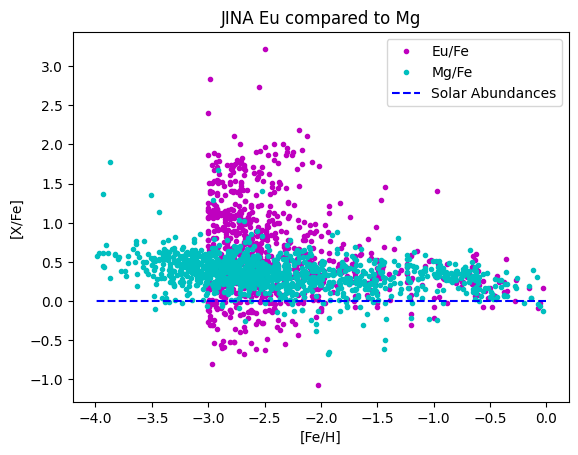

In [4]:
plt.plot(sanitized_EuJINAdataX, sanitized_EuJINAdataY, "m.", label="Eu/Fe")
plt.plot(sanitized_MgJINAdataX, sanitized_MgJINAdataY,"c.", label="Mg/Fe")
plt.plot(np.linspace(0,-4,10),np.linspace(0,0,10),"b--", label="Solar Abundances")

plt.legend()
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=10))
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=10))

plt.xlabel("[Fe/H]")
plt.ylabel("[X/Fe]")

plt.title("JINA Eu compared to Mg")

plt.show()



In [5]:
SAGAdataMg0 = SAGAtxtRead('/content/cgisess_Mg_CEMP-no_MS.dat')
SAGAdataMg1 = SAGAtxtRead('/content/cgisess_Mg_CEMP-no_RGB.dat')
SAGAdataMg2 = SAGAtxtRead('/content/cgisess_Mg_CEMP-s_MS.dat')
SAGAdataMg3 = SAGAtxtRead('/content/cgisess_Mg_CEMP-s_RGB.dat')
SAGAdataMg4 = SAGAtxtRead("/content/cgisess_Mg_Crich_MS.dat")
SAGAdataMg5 = SAGAtxtRead('/content/cgisess_Mg_Crich_RGB.dat')
SAGAdataMg6 = SAGAtxtRead('/content/cgisess_Mg_EMP_MS.dat')
SAGAdataMg7 = SAGAtxtRead('/content/cgisess_Mg_EMP_RGB.dat')
SAGAdataMg8 = SAGAtxtRead('/content/cgisess_Mg_MP.dat')


SAGAdataEu1 = SAGAtxtRead('/content/cgisess_Eu_CEMP-no_RGB.dat')
SAGAdataEu2 = SAGAtxtRead('/content/cgisess_Eu_CEMP-s_MS.dat')
SAGAdataEu3 = SAGAtxtRead('/content/cgisess_Eu_CEMP-s_RGB.dat')
SAGAdataEu4 = SAGAtxtRead("/content/cgisess_Eu_Crich_MS.dat")
SAGAdataEu5 = SAGAtxtRead('/content/cgisess_Eu_Crich_RGB.dat')
SAGAdataEu6 = SAGAtxtRead('/content/cgisess_Eu_EMP_MS.dat')
SAGAdataEu7 = SAGAtxtRead('/content/cgisess_Eu_EMP_RGB.dat')
SAGAdataEu8 = SAGAtxtRead('/content/cgisess_Eu_MP.dat')

In [6]:
#more hacky sanitisation, loopng a function for this convert might be better

SAGAdataMg0 = np.array([row[:-1] for row in SAGAdataMg0[1:]], dtype=float)
SAGAdataMg1 = np.array([row[:-1] for row in SAGAdataMg1[1:]], dtype=float)
SAGAdataMg2 = np.array([row[:-1] for row in SAGAdataMg2[1:]], dtype=float)
SAGAdataMg3 = np.array([row[:-1] for row in SAGAdataMg3[1:]], dtype=float)
SAGAdataMg4 = np.array([row[:-1] for row in SAGAdataMg4[1:]], dtype=float)
SAGAdataMg5 = np.array([row[:-1] for row in SAGAdataMg5[1:]], dtype=float)
SAGAdataMg6 = np.array([row[:-1] for row in SAGAdataMg6[1:]], dtype=float)
SAGAdataMg7 = np.array([row[:-1] for row in SAGAdataMg7[1:]], dtype=float)
SAGAdataMg8 = np.array([row[:-1] for row in SAGAdataMg8[1:]], dtype=float)

SAGAdataEu1 = np.array([row[:-1] for row in SAGAdataEu1[1:]], dtype=float)
SAGAdataEu2 = np.array([row[:-1] for row in SAGAdataEu2[1:]], dtype=float)
SAGAdataEu3 = np.array([row[:-1] for row in SAGAdataEu3[1:]], dtype=float)
SAGAdataEu4 = np.array([row[:-1] for row in SAGAdataEu4[1:]], dtype=float)
SAGAdataEu5 = np.array([row[:-1] for row in SAGAdataEu5[1:]], dtype=float)
SAGAdataEu6 = np.array([row[:-1] for row in SAGAdataEu6[1:]], dtype=float)
SAGAdataEu7 = np.array([row[:-1] for row in SAGAdataEu7[1:]], dtype=float)
SAGAdataEu8 = np.array([row[:-1] for row in SAGAdataEu8[1:]], dtype=float)

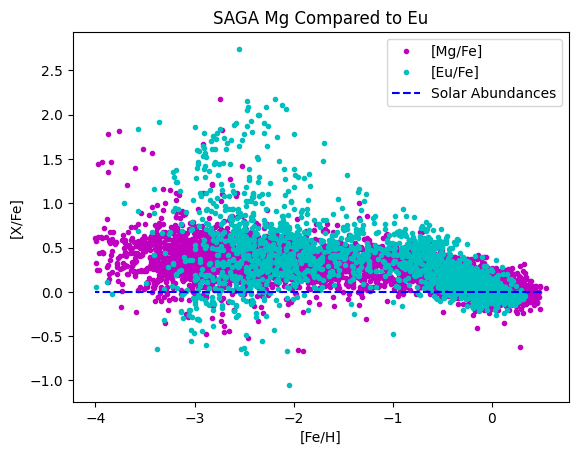

In [18]:
plt.plot(SAGAdataMg1[:,0],SAGAdataMg1[:,1],"m.",label="[Mg/Fe]")
plt.plot(SAGAdataMg2[:,0],SAGAdataMg2[:,1],"m.")
plt.plot(SAGAdataMg3[:,0],SAGAdataMg3[:,1],"m.")
plt.plot(SAGAdataMg4[:,0],SAGAdataMg4[:,1],"m.")
plt.plot(SAGAdataMg5[:,0],SAGAdataMg5[:,1],"m.")
plt.plot(SAGAdataMg6[:,0],SAGAdataMg6[:,1],"m.")
plt.plot(SAGAdataMg7[:,0],SAGAdataMg7[:,1],"m.")
plt.plot(SAGAdataMg8[:,0],SAGAdataMg8[:,1],"m.")
plt.plot(SAGAdataMg0[:,0], SAGAdataMg0[:,1],"m.")

plt.plot(SAGAdataEu1[:,0],SAGAdataEu1[:,1],"c.",label="[Eu/Fe]")
plt.plot(SAGAdataEu2[:,0],SAGAdataEu2[:,1],"c.")
plt.plot(SAGAdataEu3[:,0],SAGAdataEu3[:,1],"c.")
plt.plot(SAGAdataEu4[:,0],SAGAdataEu4[:,1],"c.")
plt.plot(SAGAdataEu5[:,0],SAGAdataEu5[:,1],"c.")
plt.plot(SAGAdataEu6[:,0],SAGAdataEu6[:,1],"c.")
plt.plot(SAGAdataEu7[:,0],SAGAdataEu7[:,1],"c.")
plt.plot(SAGAdataEu8[:,0],SAGAdataEu8[:,1],'c.')

plt.plot(np.linspace(0.5,-4,10),np.linspace(0,0,10),"b--", label="Solar Abundances")

plt.xlabel("[Fe/H]")
plt.ylabel("[X/Fe]")
plt.legend()
plt.title("SAGA Mg Compared to Eu")

plt.show()

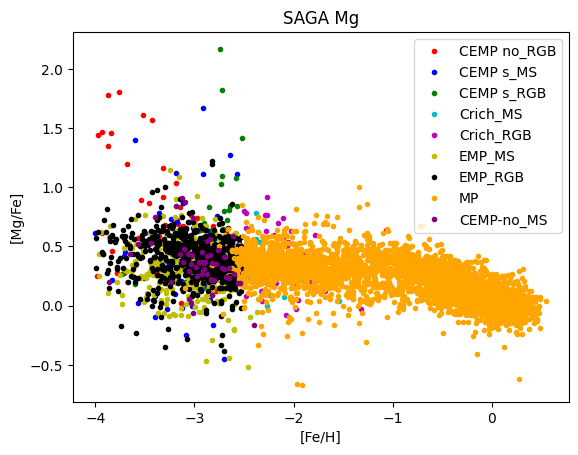

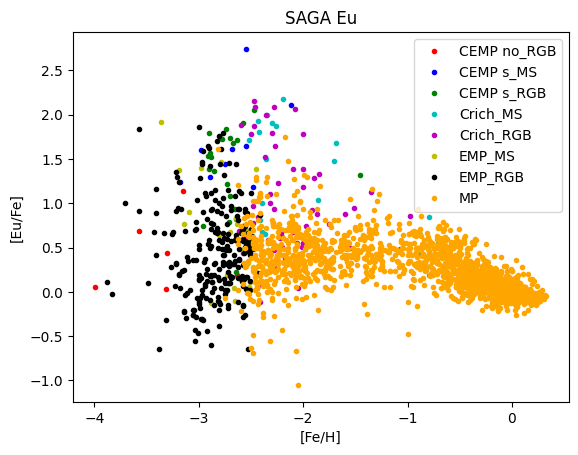

In [10]:
plt.plot(SAGAdataMg1[:,0],SAGAdataMg1[:,1],"r.",label="CEMP no_RGB")
plt.plot(SAGAdataMg2[:,0],SAGAdataMg2[:,1],"b.",label="CEMP s_MS")
plt.plot(SAGAdataMg3[:,0],SAGAdataMg3[:,1],"g.",label="CEMP s_RGB")
plt.plot(SAGAdataMg4[:,0],SAGAdataMg4[:,1],"c.",label="Crich_MS")
plt.plot(SAGAdataMg5[:,0],SAGAdataMg5[:,1],"m.",label="Crich_RGB")
plt.plot(SAGAdataMg6[:,0],SAGAdataMg6[:,1],"y.",label="EMP_MS")
plt.plot(SAGAdataMg7[:,0],SAGAdataMg7[:,1],"k.",label="EMP_RGB")
plt.plot(SAGAdataMg8[:,0],SAGAdataMg8[:,1],color='#FFA500', marker='.', linestyle='',label="MP")
plt.plot(SAGAdataMg0[:,0], SAGAdataMg0[:,1], color='#800080', marker='.', linestyle='',label="CEMP-no_MS")


plt.xlabel("[Fe/H]")
plt.ylabel("[Mg/Fe]")

plt.title("SAGA Mg")
plt.legend()
plt.show()

plt.plot(SAGAdataEu1[:,0],SAGAdataEu1[:,1],"r.",label="CEMP no_RGB")
plt.plot(SAGAdataEu2[:,0],SAGAdataEu2[:,1],"b.",label="CEMP s_MS")
plt.plot(SAGAdataEu3[:,0],SAGAdataEu3[:,1],"g.",label="CEMP s_RGB")
plt.plot(SAGAdataEu4[:,0],SAGAdataEu4[:,1],"c.",label="Crich_MS")
plt.plot(SAGAdataEu5[:,0],SAGAdataEu5[:,1],"m.",label="Crich_RGB")
plt.plot(SAGAdataEu6[:,0],SAGAdataEu6[:,1],"y.",label="EMP_MS")
plt.plot(SAGAdataEu7[:,0],SAGAdataEu7[:,1],"k.",label="EMP_RGB")
plt.plot(SAGAdataEu8[:,0],SAGAdataEu8[:,1],color='#FFA500', marker='.', linestyle='',label="MP")

plt.xlabel("[Fe/H]")
plt.ylabel("[Eu/Fe]")

plt.title("SAGA Eu")
plt.legend()
plt.show()